<a href="https://colab.research.google.com/github/Juliana001/AnaliseDeDados_projetosPessoais/blob/main/Analise_de_Planos_de_saude_cancelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![Juliana](https://drive.google.com/uc?export=view&id=1bwzIHzfmNIqptqxtTf6nUKgazQaxgdhZ)



##Este notebook foi desenvolvido por Juliana do N. Rocha com dados encontrados no portal de dados abertos do governo federal brasileiro. O principal objetivo desse notebook é entender quais são as principais causas dos cancelamentos de planos de saúde no Brasil.


---



##Problema: O mercado de planos de saúde brasileiro sofre mudanças frequentes, com operadoras sendo registradas e descredenciadas pela ANS. Isso afeta diretamente consumidores, prestadores de serviço e a concorrência. A ANS e outras entidades precisam entender quais fatores estão associados ao descredenciamento de operadoras para criar políticas de prevenção e proteção ao consumidor.

##Quais características (modalidade, região, tempo de atuação, etc.) estão associadas a um maior risco de descredenciamento de uma operadora de plano de saúde?

*Problema gerado pelo chatGPT com os nomes das colunas do dataset*
*dataset extraído de: https://dados.gov.br/dados/conjuntos-dados/operadoras-de-planos-de-saude-canceladas*


#Estrutura desse notebook:

##1- importação do dataset
##2- limpeza e organização
##3- análise exploratória dos dados (estatísticas)
##4- inferências
##5- conclusões

#Parte 1: importação do dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dadosPlanos = pd.read_csv('/content/Relatorio_planosdesaude_canceladas - Relatorio_cadop_canceladas.csv')

#por questão de segurança, sempre faço uma cópia do dataset original, uma vez que análise de dados envolve
#manipulação de dados, o que facilmente pode colocar um dataset inteiro a perder.
dadosPlanos_copia = dadosPlanos.copy()

display(dadosPlanos)

,REGISTRO_OPERADORA,CNPJ,Razao_Social,Nome_Fantasia,Modalidade,Logradouro,Numero,Complemento,Bairro,Cidade,...,DDD,Telefone,Fax,Endereco_eletronico,Representante,Cargo_Representante,Regiao_de_Comercializacao,Data_Registro_ANS,Data_Descredenciamento,Motivo_do_Descredenciamento
0,410942,3607971000192,24 HORAS SISTEMA DE SAUDE S/C LTDA,24 HORAS,Medicina de Grupo,RUA PROPICIA,187,NaN,ENGENHO NOVO,Rio de Janeiro,...,21,25010935,25010935,saude24-horas@ig.com.br,MARCOS ANTONIO GARCIA PEREIRA,SOCIO GERENTE,NaN,2000-03-23,2003-12-19,Pedido de cancelamento
1,422908,41788751000100,3S ADMINISTRADORA DE BENEFICIOS LTDA,3S ADMINISTRADORA DE BENEFICIOS,Administradora de Benefícios,RUA ITÁLIA,33,SALA 6,JARDIM BONFIGLIOLI,Jundiaí,...,11,42263247,NaN,pietrorocchi37@gmail.com,ANAMELIA MONTEIRO GUERRA ROCCHI,SÓCIO ADMINISTRADOR,6.0,2021-07-12,2025-07-21,BAIXA DE INSCRIÇÃO NO CNPJ
2,419575,18108766000150,A LA SANTE ADMINISTRADORA DE BENEFICIO LTDA.,A LA SANTE,Administradora de Benefícios,RUA OLIMPIADAS,205,4º ANDAR,VILA OLIMPIA,São Paulo,...,11,36833438,NaN,NaN,LARISSA DIAS DA SILVA,SOCIA ADMINISTRADORA,4.0,2014-10-06,2017-10-10,Deliberação de Diretoria Colegiada
3,320439,50928563000112,A M P ASSISTENCIA MEDICA PAULISTA S/C LTDA,A M P ASSISTENCIA MEDICA PAULISTA S/C LTDA,Medicina de Grupo,RUA CAV. ERNESTO GIULIANO,979,NaN,OLIMPICO,São Caetano do Sul,...,11,26354,26354,NaN,MOYSES FRIEDHEIM,DIRETOR TESOUREIRO,NaN,1999-01-27,2000-12-13,Pedido de cancelamento
4,406821,3246912000136,A ORAL OESTE'S ASSISTENCIA EM ODONTOLOGIA S/C ...,A ORAL OESTE'S ASSISTENCIA EM ODONTOLOGIA S/C ...,Odontologia de Grupo,RUA: BRIGADEIRO GAVIÃO PEIXOTO,132,NaN,LAPA,São Paulo,...,11,8330140,NaN,NaN,ANGELA RUGGIERO,NaN,NaN,1999-08-03,2003-05-29,Ausência de operação - Deliberação de Diretori...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,339750,1382881000115,WS OPERADORA DE PLANOS DE SAÚDE LTDA - EM LIQU...,LIFE SÃO PAULO ASSISTÊNCIA MÉDICA - LIFE SP,Medicina de Grupo,RUA OSVALDO CRUZ,467,NaN,JD NOSSA SENHORA AUXILIADORA,Campinas,...,11,25131234,55942373,diretoria@lifespsaude.com.br,ACHILLI SFIZZO JUNIOR,SOCIO ADMINISTRADOR,5.0,1999-01-05,2020-02-17,Liquidação Extrajudicial
3032,409677,62568084000111,WSC ASSISTENCIA MEDICA ESPECIALIZADA S/C LTDA,WSC,Medicina de Grupo,RUA ROLAND GARROS,2329,NaN,JARDIM BRASIL,São Paulo,...,11,62426093,62426093,waltercarvalho@lexpo.com.br,WALTER LUIZ FERRAZ CARVALHO,DIRETOR,NaN,1999-11-10,2002-03-22,Pedido de cancelamento
3033,422568,39330166000101,X6 ADMINISTRADORA DE BENEFICIOS LTDA,NaN,Administradora de Benefícios,RUA DOUTOR LADYR RIBEIRO,36,NaN,CAMBOINHAS,Niterói,...,21,980768883,NaN,RICK@GRUPOX6.COM.BR,RICK DE OLIVEIRA ROSA,ADMINISTRADOR,NaN,2021-01-16,2023-01-16,Alternat. à Liquidação - Deliberação de Direto...
3034,417009,10311779000110,YES ODONTOLOGIA LTDA,NaN,Odontologia de Grupo,AV. AMAZONAS,641,SALA 409,CENTRO,Belo Horizonte,...,31,30486144,NaN,ans@yesodontologia.com.br,LETÍCIA MENICUCCI GERALDI,SÓCIA-ADMINISTRADORA,4.0,2009-07-03,2017-05-18,Pedido de cancelamento


#Parte 2: limpeza e organização

##Limpeza

In [ ]:
# analisar valores nulos
missing_values_count = dadosPlanos.isnull().sum
missing_values_count()

,0
REGISTRO_OPERADORA,0
CNPJ,0
Razao_Social,0
Nome_Fantasia,453
Modalidade,0
Logradouro,2
Numero,43
Complemento,1730
Bairro,8
Cidade,0


In [ ]:
#analisar linhas duplicadas
duplicated_lines = dadosPlanos.duplicated().sum()
print(duplicated_lines)

0


##Essa verficicação inicial nos mostra que há dados faltantes em dados de localização, dados de contato, informações dos representantes, região de comercialização, datas de registro e descredenciamento e motivo de descredenciamento.

##Com a finalidade de trazer mais acurácia para nossa análise vamos excluir, por enquanto, as linhas que não tem região de comercialização, motivo de descredenciamento.

##Para fins de melhor comprieensão dos dados vou disponibilizar aqui uma parte do dicionário de dados que também pode ser encontrado no link do início.

###Área onde a operadora de plano privado de assistência à saúde comercializa ou disponibiliza seu plano de saúde, nos termos do Anexo I da Resolução Normativa nº 209/2009, da ANS.
*  Região 1: em todo o território nacional ou em grupos de pelo menos três estados dentre os seguintes: São Paulo, Rio de Janeiro, Minas Gerais, Rio Grande do Sul, Paraná e Bahia;
*  Região 2: no Estado de São Paulo ou em mais de um estado, excetuando os grupos definidos no critério da região 1;
*  Região 3: em um único estado, qualquer que seja ele, excetuando-se o Estado de São Paulo;
* Região 4: no Município de São Paulo, do Rio de Janeiro, de Belo Horizonte, de Porto Alegre ou de Curitiba ou de Brasília;
* Região 5: em grupo de municípios, excetuando os definidos na região 4; e
* Região 6: em um único município, excetuando os definidos na região 4

In [ ]:
#excluindo todas as linhas com valores nulos em região de comercialização e motivo de descredenciamento
dadosPlanos = dadosPlanos.dropna(subset=['Regiao_de_Comercializacao','Motivo_do_Descredenciamento', 'Data_Registro_ANS', 'Data_Descredenciamento'])
display(dadosPlanos)

,REGISTRO_OPERADORA,CNPJ,Razao_Social,Nome_Fantasia,Modalidade,Logradouro,Numero,Complemento,Bairro,Cidade,...,Telefone,Fax,Endereco_eletronico,Representante,Cargo_Representante,Regiao_de_Comercializacao,Data_Registro_ANS,Data_Descredenciamento,Motivo_do_Descredenciamento,Ano
1,422908,41788751000100,3S ADMINISTRADORA DE BENEFICIOS LTDA,3S ADMINISTRADORA DE BENEFICIOS,Administradora de Benefícios,RUA ITÁLIA,33,SALA 6,JARDIM BONFIGLIOLI,Jundiaí,...,42263247,NaN,pietrorocchi37@gmail.com,ANAMELIA MONTEIRO GUERRA ROCCHI,SÓCIO ADMINISTRADOR,6.0,2021-07-12,2025-07-21,BAIXA DE INSCRIÇÃO NO CNPJ,2021
2,419575,18108766000150,A LA SANTE ADMINISTRADORA DE BENEFICIO LTDA.,A LA SANTE,Administradora de Benefícios,RUA OLIMPIADAS,205,4º ANDAR,VILA OLIMPIA,São Paulo,...,36833438,NaN,NaN,LARISSA DIAS DA SILVA,SOCIA ADMINISTRADORA,4.0,2014-10-06,2017-10-10,Deliberação de Diretoria Colegiada,2014
6,413763,4220477000133,A S ASSISTENCIA ODONTOLOGICA LTDA.,ODONTOREAL,Odontologia de Grupo,R MARIA DA GLÓRIA DE OLIVEIRA RODRIGUES,12,TÉRREO,MANGABEIRA I,João Pessoa,...,32385425,32385425,odontoreale@ig.com.br,SEVERINA BRASILIANO TEIXEIRA,SOCIA ADMINISTRADORA,6.0,2001-05-28,2016-03-09,Deliberação de Diretoria Colegiada,2001
8,344818,43363241000108,A.I.S. - ASSISTENCIA ODONTOLOGICA REUNIDA S/S...,NaN,Odontologia de Grupo,RUA JERONIMO DA VEIGA,428,NaN,ITAIM BIBI,São Paulo,...,30796003,40339921,ais.odonto@terra.com.br,ANDRE TORTAMANO,GERENTE,4.0,1998-12-16,2015-05-14,Pedido de cancelamento,1998
10,415791,6370751000186,A.M.P VENTURINI SERVIÇOS ODONTOLÓGICOS LTDA.,SOMA,Odontologia de Grupo,RUA VISCONDE DE INHAÚMA,468,SALA 69,CENTRO,Ribeirão Preto,...,39312056,39312056,somaconvenio@gmail.com,MARCELO PETENUSCI VENTURINI,DIRETOR,5.0,2006-10-25,2012-05-28,Pedido de cancelamento,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,345628,93209765000117,WMS SUPERMERCADOS DO BRASIL LTDA,NaN,Autogestão,AVENIDA SERTÓRIO,6600,SOBRELOJA,SARANDI,Porto Alegre,...,33494471,32174522,brbenefi@wal-mart.com,DANILO LEAL GUIMARÃES,GERENTE DE REMUNERAÇÃO E BENEF,1.0,1998-12-30,2019-02-26,Pedido de cancelamento,1998
3030,327492,72069404000142,WORLD MED CARD SISTEMAS E LANÇAMENTOS LTDA,WORLD MED CARD,Medicina de Grupo,RUA ALAÍDE,40,NaN,MADUREIRA,Rio de Janeiro,...,24645951,33597788,worldmed@worldmed.com,CARLOS MARCELO GALDINO DIAS,SÓCIO-GERENTE,4.0,1998-12-31,2012-09-05,Deliberação de Diretoria Colegiada,1998
3031,339750,1382881000115,WS OPERADORA DE PLANOS DE SAÚDE LTDA - EM LIQU...,LIFE SÃO PAULO ASSISTÊNCIA MÉDICA - LIFE SP,Medicina de Grupo,RUA OSVALDO CRUZ,467,NaN,JD NOSSA SENHORA AUXILIADORA,Campinas,...,25131234,55942373,diretoria@lifespsaude.com.br,ACHILLI SFIZZO JUNIOR,SOCIO ADMINISTRADOR,5.0,1999-01-05,2020-02-17,Liquidação Extrajudicial,1999
3034,417009,10311779000110,YES ODONTOLOGIA LTDA,NaN,Odontologia de Grupo,AV. AMAZONAS,641,SALA 409,CENTRO,Belo Horizonte,...,30486144,NaN,ans@yesodontologia.com.br,LETÍCIA MENICUCCI GERALDI,SÓCIA-ADMINISTRADORA,4.0,2009-07-03,2017-05-18,Pedido de cancelamento,2009


##Por enquanto essas serão nossas exclusões para limpeza, mas nada impede que excluamos mais futuramente.


##Quanto a organização: não faremos nada pois todas as colunas já são autoexplicativas.

#Parte 3: análise exploratória dos dados

Regiao_de_Comercializacao
6.0    452
5.0    406
4.0    377
3.0     78
1.0     76
2.0     27
Name: count, dtype: int64


Text(0, 0.5, 'Contagem')

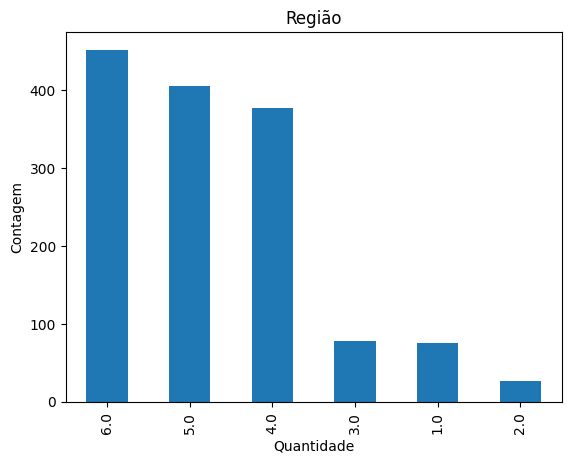

In [ ]:
import matplotlib.pyplot as plt

#Vamos olhar a quantidade de empresas descredenciadas por região
regions_count = dadosPlanos['Regiao_de_Comercializacao'].value_counts()
print(regions_count)

regions_count.plot.bar()
plt.title('Região')
plt.xlabel('Quantidade')
plt.ylabel('Contagem')

Nessa primeira análise podemos perceber que as duas maiores regiões, com mais de 400 cancelamentos, são cidades que não as grandes capitais.
Disso podemos fazer uma inferência: os planos com maiores cancelamentos são planos que não conseguiram se lançar nas grandes capitais do Brasil:  São Paulo, do Rio de Janeiro, de Belo Horizonte, Porto Alegre, Curitiba ou Brasília.



##Agora vamos analisar os motivos de descredenciamento

Motivo_do_Descredenciamento
Pedido de cancelamento                                          561
Deliberação de Diretoria Colegiada                              211
Liquidação Extrajudicial                                        209
Alternat. à Liquidação - Deliberação de Diretoria Colegiada     152
Por incorporação                                                 96
Descumprimento da RN n.º 100/2005                                94
Descumprimento de disposição legal                               29
Ausência de operação                                             27
Empresa operava com Sistema de Desconto                          12
Pedido de Cancelamento pós cisão e incorp. operação de plano      9
INEXISTÊNCIA DE PRODUTO ATIVO POR MAIS DE 180 DIAS                5
Ausência de operação - Deliberação de Diretoria Colegiada         4
Decretação de Falência por outros órgãos                          4
BAIXA DE INSCRIÇÃO NO CNPJ                                        3
Name: count, dtype: 

Text(0, 0.5, 'Contagem')

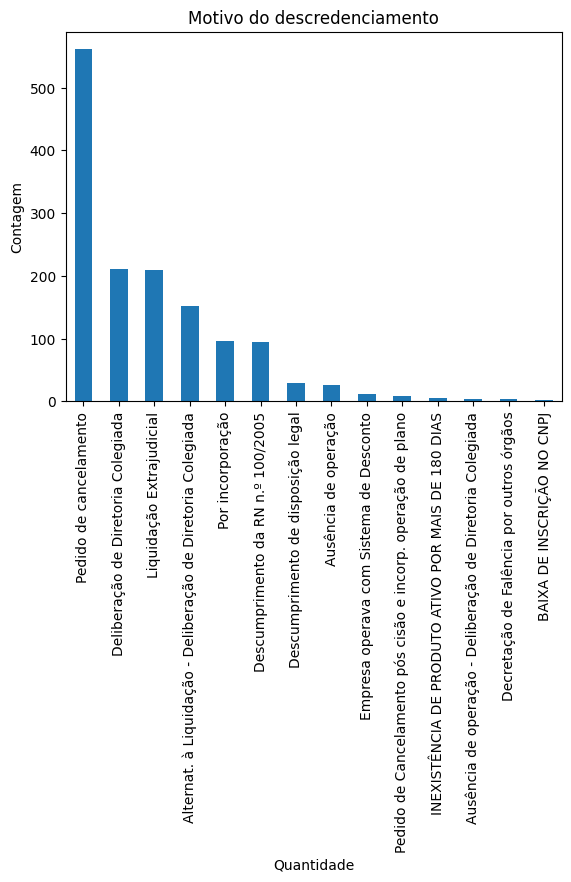

In [ ]:
reasons_count = dadosPlanos['Motivo_do_Descredenciamento'].value_counts()
print(reasons_count)

reasons_count.plot.bar()
plt.title('Motivo do descredenciamento')
plt.xlabel('Quantidade')
plt.ylabel('Contagem')

##Agora vamos analisar as modalidades

Modalidade
Medicina de Grupo                    531
Odontologia de Grupo                 405
Autogestão                           119
Cooperativa Médica                    92
Administradora de Benefícios          91
Filantropia                           89
Cooperativa odontológica              68
Administradora                        15
Seguradora Especializada em Saúde      6
Name: count, dtype: int64


Text(0, 0.5, 'Contagem')

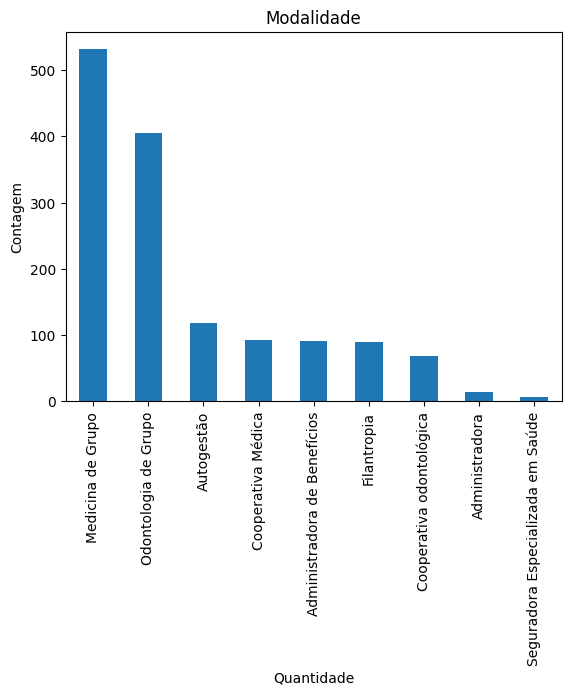

In [ ]:
modality_count = dadosPlanos['Modalidade'].value_counts()
print(modality_count)

modality_count.plot.bar()
plt.title('Modalidade')
plt.xlabel('Quantidade')
plt.ylabel('Contagem')

###De acordo com o google: "Medicina de grupo é um modelo de assistência médica onde uma operadora de planos de saúde, geralmente uma empresa, contrata médicos e outros profissionais de saúde para formar uma rede de atendimento."

##Agora iremos analisar o tempo de atuação

In [ ]:
from datetime import datetime

dadosPlanos['Data_Registro_ANS'] = pd.to_datetime(dadosPlanos['Data_Registro_ANS'])
dadosPlanos['Ano'] = dadosPlanos['Data_Registro_ANS'].dt.year

display(dadosPlanos)

/tmp/ipython-input-284895149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosPlanos['Data_Registro_ANS'] = pd.to_datetime(dadosPlanos['Data_Registro_ANS'])
/tmp/ipython-input-284895149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dadosPlanos['Ano'] = dadosPlanos['Data_Registro_ANS'].dt.year


,REGISTRO_OPERADORA,CNPJ,Razao_Social,Nome_Fantasia,Modalidade,Logradouro,Numero,Complemento,Bairro,Cidade,...,Telefone,Fax,Endereco_eletronico,Representante,Cargo_Representante,Regiao_de_Comercializacao,Data_Registro_ANS,Data_Descredenciamento,Motivo_do_Descredenciamento,Ano
1,422908,41788751000100,3S ADMINISTRADORA DE BENEFICIOS LTDA,3S ADMINISTRADORA DE BENEFICIOS,Administradora de Benefícios,RUA ITÁLIA,33,SALA 6,JARDIM BONFIGLIOLI,Jundiaí,...,42263247,NaN,pietrorocchi37@gmail.com,ANAMELIA MONTEIRO GUERRA ROCCHI,SÓCIO ADMINISTRADOR,6.0,2021-07-12,2025-07-21,BAIXA DE INSCRIÇÃO NO CNPJ,2021
2,419575,18108766000150,A LA SANTE ADMINISTRADORA DE BENEFICIO LTDA.,A LA SANTE,Administradora de Benefícios,RUA OLIMPIADAS,205,4º ANDAR,VILA OLIMPIA,São Paulo,...,36833438,NaN,NaN,LARISSA DIAS DA SILVA,SOCIA ADMINISTRADORA,4.0,2014-10-06,2017-10-10,Deliberação de Diretoria Colegiada,2014
6,413763,4220477000133,A S ASSISTENCIA ODONTOLOGICA LTDA.,ODONTOREAL,Odontologia de Grupo,R MARIA DA GLÓRIA DE OLIVEIRA RODRIGUES,12,TÉRREO,MANGABEIRA I,João Pessoa,...,32385425,32385425,odontoreale@ig.com.br,SEVERINA BRASILIANO TEIXEIRA,SOCIA ADMINISTRADORA,6.0,2001-05-28,2016-03-09,Deliberação de Diretoria Colegiada,2001
8,344818,43363241000108,A.I.S. - ASSISTENCIA ODONTOLOGICA REUNIDA S/S...,NaN,Odontologia de Grupo,RUA JERONIMO DA VEIGA,428,NaN,ITAIM BIBI,São Paulo,...,30796003,40339921,ais.odonto@terra.com.br,ANDRE TORTAMANO,GERENTE,4.0,1998-12-16,2015-05-14,Pedido de cancelamento,1998
10,415791,6370751000186,A.M.P VENTURINI SERVIÇOS ODONTOLÓGICOS LTDA.,SOMA,Odontologia de Grupo,RUA VISCONDE DE INHAÚMA,468,SALA 69,CENTRO,Ribeirão Preto,...,39312056,39312056,somaconvenio@gmail.com,MARCELO PETENUSCI VENTURINI,DIRETOR,5.0,2006-10-25,2012-05-28,Pedido de cancelamento,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,345628,93209765000117,WMS SUPERMERCADOS DO BRASIL LTDA,NaN,Autogestão,AVENIDA SERTÓRIO,6600,SOBRELOJA,SARANDI,Porto Alegre,...,33494471,32174522,brbenefi@wal-mart.com,DANILO LEAL GUIMARÃES,GERENTE DE REMUNERAÇÃO E BENEF,1.0,1998-12-30,2019-02-26,Pedido de cancelamento,1998
3030,327492,72069404000142,WORLD MED CARD SISTEMAS E LANÇAMENTOS LTDA,WORLD MED CARD,Medicina de Grupo,RUA ALAÍDE,40,NaN,MADUREIRA,Rio de Janeiro,...,24645951,33597788,worldmed@worldmed.com,CARLOS MARCELO GALDINO DIAS,SÓCIO-GERENTE,4.0,1998-12-31,2012-09-05,Deliberação de Diretoria Colegiada,1998
3031,339750,1382881000115,WS OPERADORA DE PLANOS DE SAÚDE LTDA - EM LIQU...,LIFE SÃO PAULO ASSISTÊNCIA MÉDICA - LIFE SP,Medicina de Grupo,RUA OSVALDO CRUZ,467,NaN,JD NOSSA SENHORA AUXILIADORA,Campinas,...,25131234,55942373,diretoria@lifespsaude.com.br,ACHILLI SFIZZO JUNIOR,SOCIO ADMINISTRADOR,5.0,1999-01-05,2020-02-17,Liquidação Extrajudicial,1999
3034,417009,10311779000110,YES ODONTOLOGIA LTDA,NaN,Odontologia de Grupo,AV. AMAZONAS,641,SALA 409,CENTRO,Belo Horizonte,...,30486144,NaN,ans@yesodontologia.com.br,LETÍCIA MENICUCCI GERALDI,SÓCIA-ADMINISTRADORA,4.0,2009-07-03,2017-05-18,Pedido de cancelamento,2009


Ano
1998    496
1999    408
2000    110
2001     66
2006     37
2007     34
2010     25
2003     20
2014     19
2011     19
2012     18
2005     18
2016     17
2015     17
2013     17
2004     16
2008     15
2009     14
2020     12
2002     10
2019      8
2018      8
2021      6
2017      5
2022      1
Name: count, dtype: int64


Text(0, 0.5, 'Contagem')

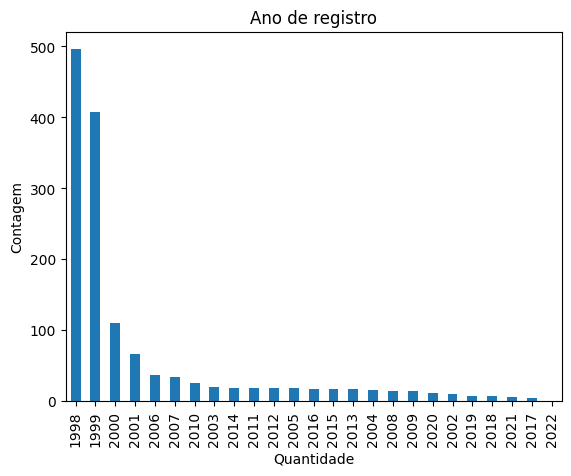

In [ ]:
year_count = dadosPlanos['Ano'].value_counts()
print(year_count)

year_count.plot.bar()
plt.title('Ano de registro')
plt.xlabel('Quantidade')
plt.ylabel('Contagem')

##Bem, até agora temos 3 informações importantes:
* ### A maioria dos descredenciamentos vem de pequenos municípios, sendo eles capitais ou não. Dentro desse grupo, 452 atende um único município e 406 atende mais de um.
* ### A maioria dos descredenciamentos vem das modalidades Medicina de grupo e Odontoloia de grupo, ou seja, uma operadora de planos de saúde, geralmente uma empresa, contrata médicos e outros profissionais de saúde para formar uma rede de atendimento.
* ### A maioria absoluta dos descredenciamentos vem de empresas que foram cadastradas antes dos anos 2000


##Para entendermos melhor essa questão dos anos, vamos analisar o tempo em que o cadastro na ANS ficou ativo

In [ ]:
dadosPlanos['Data_Descredenciamento'] = pd.to_datetime(dadosPlanos['Data_Descredenciamento'])
dadosPlanos['Ano_desc'] = dadosPlanos['Data_Descredenciamento'].dt.year

display(dadosPlanos)

,REGISTRO_OPERADORA,CNPJ,Razao_Social,Nome_Fantasia,Modalidade,Logradouro,Numero,Complemento,Bairro,Cidade,...,Fax,Endereco_eletronico,Representante,Cargo_Representante,Regiao_de_Comercializacao,Data_Registro_ANS,Data_Descredenciamento,Motivo_do_Descredenciamento,Ano,Ano_desc
1,422908,41788751000100,3S ADMINISTRADORA DE BENEFICIOS LTDA,3S ADMINISTRADORA DE BENEFICIOS,Administradora de Benefícios,RUA ITÁLIA,33,SALA 6,JARDIM BONFIGLIOLI,Jundiaí,...,NaN,pietrorocchi37@gmail.com,ANAMELIA MONTEIRO GUERRA ROCCHI,SÓCIO ADMINISTRADOR,6.0,2021-07-12,2025-07-21,BAIXA DE INSCRIÇÃO NO CNPJ,2021,2025
2,419575,18108766000150,A LA SANTE ADMINISTRADORA DE BENEFICIO LTDA.,A LA SANTE,Administradora de Benefícios,RUA OLIMPIADAS,205,4º ANDAR,VILA OLIMPIA,São Paulo,...,NaN,NaN,LARISSA DIAS DA SILVA,SOCIA ADMINISTRADORA,4.0,2014-10-06,2017-10-10,Deliberação de Diretoria Colegiada,2014,2017
6,413763,4220477000133,A S ASSISTENCIA ODONTOLOGICA LTDA.,ODONTOREAL,Odontologia de Grupo,R MARIA DA GLÓRIA DE OLIVEIRA RODRIGUES,12,TÉRREO,MANGABEIRA I,João Pessoa,...,32385425,odontoreale@ig.com.br,SEVERINA BRASILIANO TEIXEIRA,SOCIA ADMINISTRADORA,6.0,2001-05-28,2016-03-09,Deliberação de Diretoria Colegiada,2001,2016
8,344818,43363241000108,A.I.S. - ASSISTENCIA ODONTOLOGICA REUNIDA S/S...,NaN,Odontologia de Grupo,RUA JERONIMO DA VEIGA,428,NaN,ITAIM BIBI,São Paulo,...,40339921,ais.odonto@terra.com.br,ANDRE TORTAMANO,GERENTE,4.0,1998-12-16,2015-05-14,Pedido de cancelamento,1998,2015
10,415791,6370751000186,A.M.P VENTURINI SERVIÇOS ODONTOLÓGICOS LTDA.,SOMA,Odontologia de Grupo,RUA VISCONDE DE INHAÚMA,468,SALA 69,CENTRO,Ribeirão Preto,...,39312056,somaconvenio@gmail.com,MARCELO PETENUSCI VENTURINI,DIRETOR,5.0,2006-10-25,2012-05-28,Pedido de cancelamento,2006,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,345628,93209765000117,WMS SUPERMERCADOS DO BRASIL LTDA,NaN,Autogestão,AVENIDA SERTÓRIO,6600,SOBRELOJA,SARANDI,Porto Alegre,...,32174522,brbenefi@wal-mart.com,DANILO LEAL GUIMARÃES,GERENTE DE REMUNERAÇÃO E BENEF,1.0,1998-12-30,2019-02-26,Pedido de cancelamento,1998,2019
3030,327492,72069404000142,WORLD MED CARD SISTEMAS E LANÇAMENTOS LTDA,WORLD MED CARD,Medicina de Grupo,RUA ALAÍDE,40,NaN,MADUREIRA,Rio de Janeiro,...,33597788,worldmed@worldmed.com,CARLOS MARCELO GALDINO DIAS,SÓCIO-GERENTE,4.0,1998-12-31,2012-09-05,Deliberação de Diretoria Colegiada,1998,2012
3031,339750,1382881000115,WS OPERADORA DE PLANOS DE SAÚDE LTDA - EM LIQU...,LIFE SÃO PAULO ASSISTÊNCIA MÉDICA - LIFE SP,Medicina de Grupo,RUA OSVALDO CRUZ,467,NaN,JD NOSSA SENHORA AUXILIADORA,Campinas,...,55942373,diretoria@lifespsaude.com.br,ACHILLI SFIZZO JUNIOR,SOCIO ADMINISTRADOR,5.0,1999-01-05,2020-02-17,Liquidação Extrajudicial,1999,2020
3034,417009,10311779000110,YES ODONTOLOGIA LTDA,NaN,Odontologia de Grupo,AV. AMAZONAS,641,SALA 409,CENTRO,Belo Horizonte,...,NaN,ans@yesodontologia.com.br,LETÍCIA MENICUCCI GERALDI,SÓCIA-ADMINISTRADORA,4.0,2009-07-03,2017-05-18,Pedido de cancelamento,2009,2017


Ano_desc
2015    103
2013    100
2007     97
2008     92
2010     91
2012     86
2014     78
2020     68
2011     65
2018     63
2016     62
2017     61
2009     59
2019     53
2022     52
2005     52
2021     50
2024     46
2006     44
2023     36
2004     29
2025     21
2003      8
Name: count, dtype: int64


Text(0, 0.5, 'Contagem')

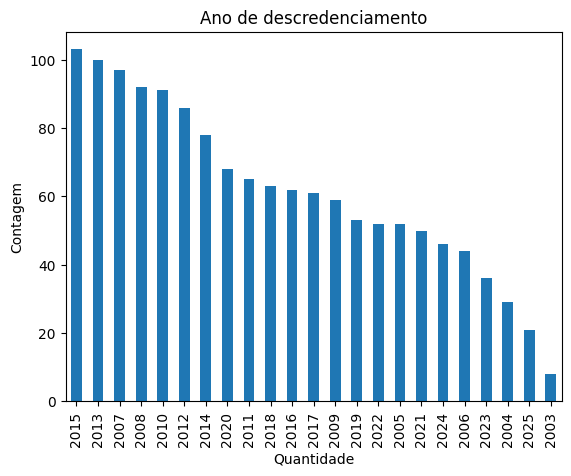

In [ ]:
yeard_count = dadosPlanos['Ano_desc'].value_counts()
print(yeard_count)

yeard_count.plot.bar()
plt.title('Ano de descredenciamento')
plt.xlabel('Quantidade')
plt.ylabel('Contagem')

##A maior parte dos descrenciamentos são entre 2007 e 2020. Temos dois caminhos para chegar em algum resultado:
* analisar o tempo de vida geral das empresas
* analisar o tempo de vida por ano

Vou começar analisando o tempo de vida geral.

In [ ]:

dadosPlanos['tempo_ativo'] = dadosPlanos['Ano_desc']-dadosPlanos['Ano']
display(dadosPlanos)

,REGISTRO_OPERADORA,CNPJ,Razao_Social,Nome_Fantasia,Modalidade,Logradouro,Numero,Complemento,Bairro,Cidade,...,Endereco_eletronico,Representante,Cargo_Representante,Regiao_de_Comercializacao,Data_Registro_ANS,Data_Descredenciamento,Motivo_do_Descredenciamento,Ano,Ano_desc,tempo_ativo
1,422908,41788751000100,3S ADMINISTRADORA DE BENEFICIOS LTDA,3S ADMINISTRADORA DE BENEFICIOS,Administradora de Benefícios,RUA ITÁLIA,33,SALA 6,JARDIM BONFIGLIOLI,Jundiaí,...,pietrorocchi37@gmail.com,ANAMELIA MONTEIRO GUERRA ROCCHI,SÓCIO ADMINISTRADOR,6.0,2021-07-12,2025-07-21,BAIXA DE INSCRIÇÃO NO CNPJ,2021,2025,4
2,419575,18108766000150,A LA SANTE ADMINISTRADORA DE BENEFICIO LTDA.,A LA SANTE,Administradora de Benefícios,RUA OLIMPIADAS,205,4º ANDAR,VILA OLIMPIA,São Paulo,...,NaN,LARISSA DIAS DA SILVA,SOCIA ADMINISTRADORA,4.0,2014-10-06,2017-10-10,Deliberação de Diretoria Colegiada,2014,2017,3
6,413763,4220477000133,A S ASSISTENCIA ODONTOLOGICA LTDA.,ODONTOREAL,Odontologia de Grupo,R MARIA DA GLÓRIA DE OLIVEIRA RODRIGUES,12,TÉRREO,MANGABEIRA I,João Pessoa,...,odontoreale@ig.com.br,SEVERINA BRASILIANO TEIXEIRA,SOCIA ADMINISTRADORA,6.0,2001-05-28,2016-03-09,Deliberação de Diretoria Colegiada,2001,2016,15
8,344818,43363241000108,A.I.S. - ASSISTENCIA ODONTOLOGICA REUNIDA S/S...,NaN,Odontologia de Grupo,RUA JERONIMO DA VEIGA,428,NaN,ITAIM BIBI,São Paulo,...,ais.odonto@terra.com.br,ANDRE TORTAMANO,GERENTE,4.0,1998-12-16,2015-05-14,Pedido de cancelamento,1998,2015,17
10,415791,6370751000186,A.M.P VENTURINI SERVIÇOS ODONTOLÓGICOS LTDA.,SOMA,Odontologia de Grupo,RUA VISCONDE DE INHAÚMA,468,SALA 69,CENTRO,Ribeirão Preto,...,somaconvenio@gmail.com,MARCELO PETENUSCI VENTURINI,DIRETOR,5.0,2006-10-25,2012-05-28,Pedido de cancelamento,2006,2012,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,345628,93209765000117,WMS SUPERMERCADOS DO BRASIL LTDA,NaN,Autogestão,AVENIDA SERTÓRIO,6600,SOBRELOJA,SARANDI,Porto Alegre,...,brbenefi@wal-mart.com,DANILO LEAL GUIMARÃES,GERENTE DE REMUNERAÇÃO E BENEF,1.0,1998-12-30,2019-02-26,Pedido de cancelamento,1998,2019,21
3030,327492,72069404000142,WORLD MED CARD SISTEMAS E LANÇAMENTOS LTDA,WORLD MED CARD,Medicina de Grupo,RUA ALAÍDE,40,NaN,MADUREIRA,Rio de Janeiro,...,worldmed@worldmed.com,CARLOS MARCELO GALDINO DIAS,SÓCIO-GERENTE,4.0,1998-12-31,2012-09-05,Deliberação de Diretoria Colegiada,1998,2012,14
3031,339750,1382881000115,WS OPERADORA DE PLANOS DE SAÚDE LTDA - EM LIQU...,LIFE SÃO PAULO ASSISTÊNCIA MÉDICA - LIFE SP,Medicina de Grupo,RUA OSVALDO CRUZ,467,NaN,JD NOSSA SENHORA AUXILIADORA,Campinas,...,diretoria@lifespsaude.com.br,ACHILLI SFIZZO JUNIOR,SOCIO ADMINISTRADOR,5.0,1999-01-05,2020-02-17,Liquidação Extrajudicial,1999,2020,21
3034,417009,10311779000110,YES ODONTOLOGIA LTDA,NaN,Odontologia de Grupo,AV. AMAZONAS,641,SALA 409,CENTRO,Belo Horizonte,...,ans@yesodontologia.com.br,LETÍCIA MENICUCCI GERALDI,SÓCIA-ADMINISTRADORA,4.0,2009-07-03,2017-05-18,Pedido de cancelamento,2009,2017,8


tempo_ativo
9     97
14    94
10    90
8     87
12    84
11    83
13    83
15    79
7     79
6     77
16    73
17    54
5     50
4     47
3     44
18    40
21    38
19    36
22    33
23    32
20    29
2     20
24    20
26    18
25    11
1     11
27     6
0      1
Name: count, dtype: int64


Text(0, 0.5, 'Contagem')

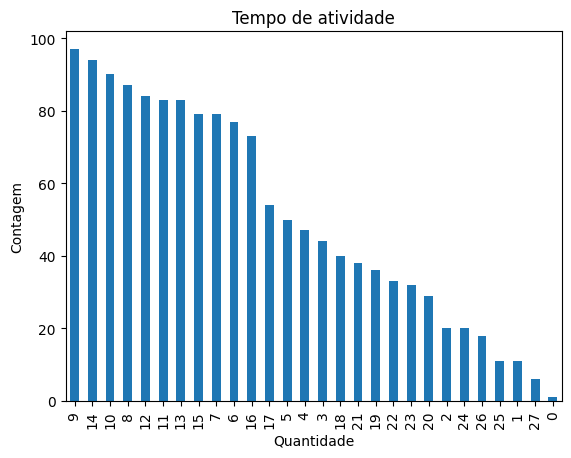

In [ ]:
livetime_count = dadosPlanos['tempo_ativo'].value_counts()
print(livetime_count)

livetime_count.plot.bar()
plt.title('Tempo de atividade')
plt.xlabel('Quantidade')
plt.ylabel('Contagem')

##O tempo de atividade fica entre 9 e 17 anos.

##Como há colunas omitidas no dataframe, vamos ver se há algo útil nelas.

In [ ]:
print(dadosPlanos.columns)

Index(['REGISTRO_OPERADORA', 'CNPJ', 'Razao_Social', 'Nome_Fantasia',
       'Modalidade', 'Logradouro', 'Numero', 'Complemento', 'Bairro', 'Cidade',
       'UF', 'CEP', 'DDD', 'Telefone', 'Fax', 'Endereco_eletronico',
       'Representante', 'Cargo_Representante', 'Regiao_de_Comercializacao',
       'Data_Registro_ANS', 'Data_Descredenciamento',
       'Motivo_do_Descredenciamento', 'Ano', 'Ano_desc', 'tempo_ativo'],
      dtype='object')


UF
SP    502
RJ    189
MG    153
RS    100
PR     73
BA     49
SC     44
PE     39
CE     38
DF     36
ES     34
GO     29
PA     22
RN     18
MA     16
AL     12
MS     11
PI     10
PB     10
MT     10
RO      6
AM      6
RR      3
SE      2
AC      2
AP      1
TO      1
Name: count, dtype: int64


Text(0, 0.5, 'Contagem')

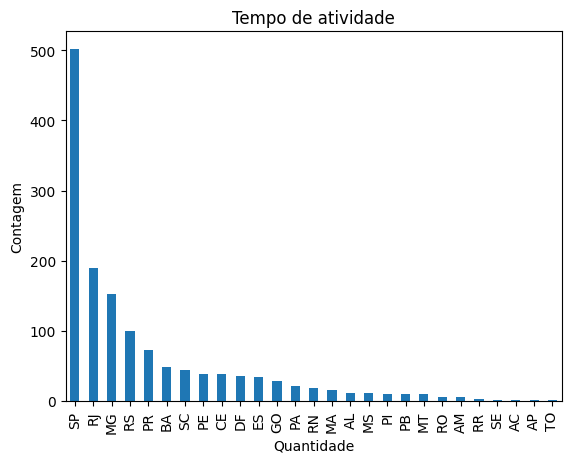

In [ ]:
uf_count = dadosPlanos['UF'].value_counts()
print(uf_count)

uf_count.plot.bar()
plt.title('Tempo de atividade')
plt.xlabel('Quantidade')
plt.ylabel('Contagem')

##Quase metade dos descredenciamentos ocorreram no estado de São Paulo.

##Aqui já temos todos os dados que precisamos para levantar o perfil das empresas descredenciadas.
* ## A maioria se encontra nos estados mais populosos do Brasil: São Paulo, Rio de Janeiro e Minas Gerais.
* ## A maioria vem das modalidades de medicina e odontologia de grupo
* ## A maioiria foi credenciada antes dos anos 2000
* ## A maioria foi descredenciada por decisão própria
* ## O tempo de atividade é de menos de 20 anos.

#Hipóteses

1.   Excesso de oferta nos grandes centros
2.   Empresas antiquadas (não acompanharam o desenvolvimento da cidade)
3.   Maior adesão da sociedade a planos de saúde populares como Cartão de todos.

